In [43]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#import sklearn as sk
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
iris_dataset = datasets.load_iris()

In [13]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
array = iris_dataset.data
target = iris_dataset.target

In [11]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
dataset = pd.DataFrame(array, columns = names)
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [18]:
target = pd.DataFrame(target, columns = ['class'])

In [20]:
target.head(10)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [21]:
data = pd.concat([dataset, target], axis =1)

In [23]:
data.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [24]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
data.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

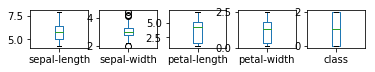

In [35]:
data.plot(kind='box', subplots = True, layout = (5,5), sharex=False, sharey=False)
plt.show()

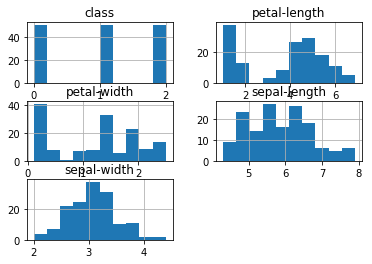

In [36]:
data.hist()
plt.show()

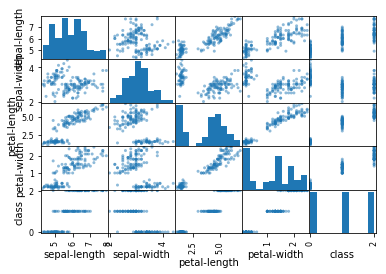

In [37]:
scatter_matrix(data)
plt.show()

# Training data

In [39]:
vector = data.values
x = vector[:, :4]
y = vector[:, 4]
validation_size = 0.2
seed = 6

In [41]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = validation_size,\
                                                                   random_state = seed)

In [42]:
seed = 6
scoring = 'accuracy'

# Building models

In [44]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

## Evaluate each model

In [45]:
results = []
names = []

for name, model in models:
    # Splitting data in ten parts. Training on 9 parts and testing on 1 part
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.941667 (0.038188)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.933333 (0.072648)
NB: 0.966667 (0.055277)
SVM: 0.966667 (0.055277)


/home/rohit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rohit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rohit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logisti

In [47]:
pd.DataFrame(results)

,0,1,2,3,4,5,6,7,8,9
0,0.916667,1.000000,0.916667,0.916667,0.916667,1.0,0.916667,0.916667,0.916667,1.000000
1,0.916667,1.000000,0.916667,1.000000,1.000000,1.0,0.916667,1.000000,1.000000,1.000000
2,0.916667,1.000000,0.916667,1.000000,1.000000,1.0,0.916667,1.000000,1.000000,0.833333
3,0.916667,0.916667,0.916667,1.000000,1.000000,1.0,0.916667,0.916667,1.000000,0.750000
4,0.916667,1.000000,1.000000,1.000000,1.000000,1.0,0.916667,1.000000,1.000000,0.833333
5,0.916667,1.000000,0.916667,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.833333
